In [8]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit import IBMQ

In [9]:
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [10]:
k_array = []
k_dict = {}
for k in range(1,21):
    q = QuantumRegister(4, 'q')
    c = ClassicalRegister(4, 'c')
    alpha1 = 0.05*k*np.pi
    beta1 = -0.05*5*np.pi
    alpha2 = 0.05*14*np.pi
    beta2 = -0.05*4*np.pi


    qc = QuantumCircuit(q, c)

    qc.h(q[0:4])

    qc.u1(alpha1*(-3/2),q[0])
    qc.u1(alpha1*(-3/2),q[3])
    qc.u1(alpha1*(-2),q[1])
    qc.u1(alpha1*(-2),q[2])

    qc.cx(q[0],q[1])
    qc.u1(2*alpha1, q[1])
    qc.cx(q[0],q[1])

    qc.cx(q[1],q[2])
    qc.u1((1/2)*alpha1, q[2])
    qc.cx(q[1],q[2])

    qc.cx(q[2],q[3])
    qc.u1(2*alpha1, q[3])
    qc.cx(q[2],q[3])

    for i in range(4):
        qc.rx(beta1,q[i])

    qc.u1(alpha2*(-3/2),q[0])
    qc.u1(alpha2*(-3/2),q[3])
    qc.u1(alpha2*(-2),q[1])
    qc.u1(alpha2*(-2),q[2])
    qc.cx(q[0],q[1])
    qc.u1(2*alpha2, q[1])
    qc.cx(q[0],q[1])
    qc.cx(q[1],q[2])
    qc.u1((1/2)*alpha2, q[2])
    qc.cx(q[1],q[2])

    qc.cx(q[2],q[3])
    qc.u1(2*alpha2, q[3])
    qc.cx(q[2],q[3])

    for i in range(4):
        qc.rx(beta2,q[i])
    qc.measure(q,c)
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    result_sim = job.result()
    counts_sim = result_sim.get_counts(qc)
    if '1010' in counts_sim:
        a1 = counts_sim['1010']
    else:
        a1 = 0
    if '0101' in counts_sim:
        a2 = counts_sim['0101']
    else:
        a2 = 0
    if '1001' in counts_sim:
        a3 = counts_sim['1001']
    else:
        a3 = 0
    a = a1+a2+a3
    k_array.append(a)
    k_dict.update({k:a})
print(k_dict)
maxcount = np.amax(k_array)
index = np.where(k_array == maxcount)
print("\n The maximum count is", maxcount, "with k-1 value(s) of", index[0] )

{1: 591, 2: 526, 3: 393, 4: 215, 5: 106, 6: 65, 7: 131, 8: 200, 9: 421, 10: 602, 11: 814, 12: 879, 13: 759, 14: 556, 15: 290, 16: 155, 17: 81, 18: 72, 19: 159, 20: 276}

 The maximum count is 879 with k-1 value(s) of [11]


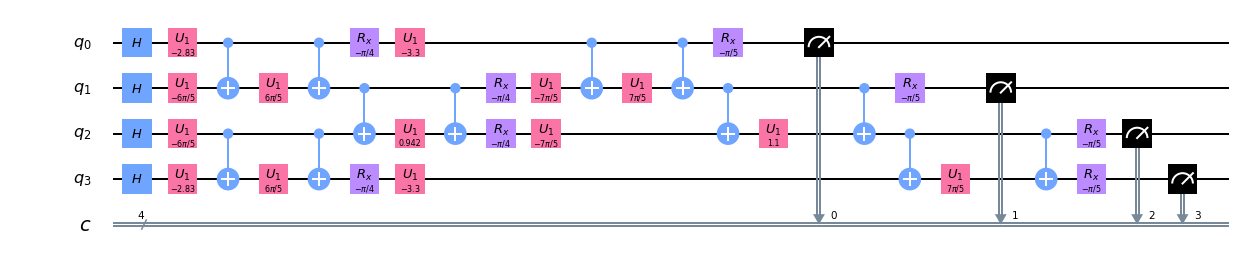

In [11]:
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
alpha1 = 0.05*12*np.pi
beta1 = -0.05*5*np.pi
alpha2 = 0.05*14*np.pi
beta2 = -0.05*4*np.pi

qc = QuantumCircuit(q, c)

qc.h(q[0:4])

qc.u1(alpha1*(-3/2),q[0])
qc.u1(alpha1*(-3/2),q[3])
qc.u1(alpha1*(-2),q[1])
qc.u1(alpha1*(-2),q[2])

qc.cx(q[0],q[1])
qc.u1(2*alpha1, q[1])
qc.cx(q[0],q[1])
qc.cx(q[2],q[3])
qc.u1(2*alpha1, q[3])
qc.cx(q[2],q[3])
qc.cx(q[1],q[2])
qc.u1((1/2)*alpha1, q[2])
qc.cx(q[1],q[2])

for i in range(4):
    qc.rx(beta1,q[i])

qc.u1(alpha2*(-3/2),q[0])
qc.u1(alpha2*(-3/2),q[3])
qc.u1(alpha2*(-2),q[1])
qc.u1(alpha2*(-2),q[2])
qc.cx(q[0],q[1])
qc.u1(2*alpha2, q[1])
qc.cx(q[0],q[1])
qc.cx(q[1],q[2])
qc.u1((1/2)*alpha2, q[2])
qc.cx(q[1],q[2])
qc.cx(q[2],q[3])
qc.u1(2*alpha2, q[3])
qc.cx(q[2],q[3])

for i in range(4):
    qc.rx(beta2,q[i])
qc.measure(q,c)
circuit_drawer(qc, scale=0.7, output='mpl')

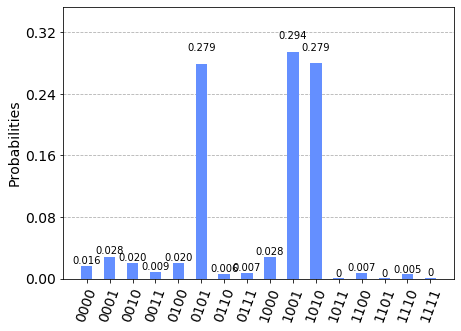

In [51]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 8126)
result_sim = job.result()
counts_sim = result_sim.get_counts(qc)
plot_histogram(counts_sim)

In [19]:
backend = provider.get_backend('ibmq_vigo')

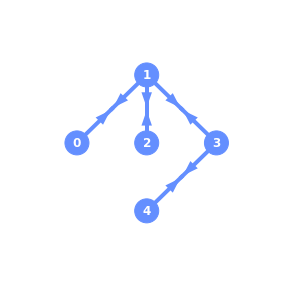

In [20]:
backend = provider.get_backend('ibmq_vigo')
plot_gate_map(backend, plot_directed=True)

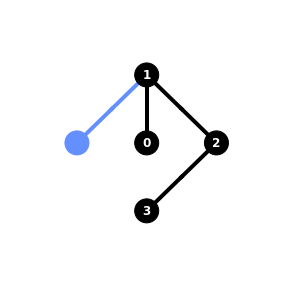

In [21]:
qc2 = transpile(qc, backend=backend, optimization_level=0, initial_layout={ q[0]:2, q[1]:1, q[2]:3, q[3]:4 })
plot_circuit_layout(qc2, backend)

In [22]:
from qiskit.tools.monitor import job_monitor
shots = 8192           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_exp = execute(qc2, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

Job Status: job has successfully run


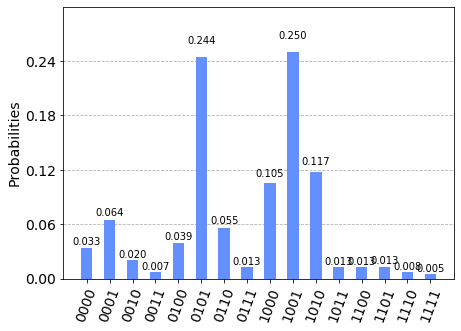

In [23]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc2)
plot_histogram([counts_exp])

In [12]:
provider = IBMQ.get_provider(group = 'uom-researchers')
backend = provider.get_backend('ibmq_johannesburg')
backend

<IBMQBackend('ibmq_johannesburg') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>

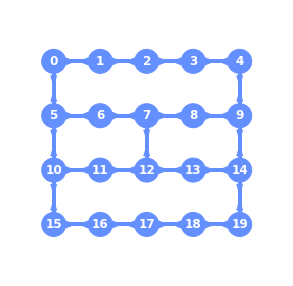

In [13]:
plot_gate_map(backend, plot_directed=True)

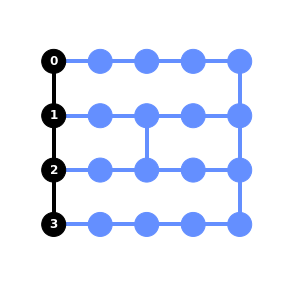

In [14]:
qc2 = transpile(qc, backend=backend, optimization_level=0, initial_layout={ q[0]:0, q[1]:5, q[2]:10, q[3]:15 })
plot_circuit_layout(qc2, backend)

In [17]:
from qiskit.tools.monitor import job_monitor
shots = 8192           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_exp = execute(qc2, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

Job Status: job has successfully run


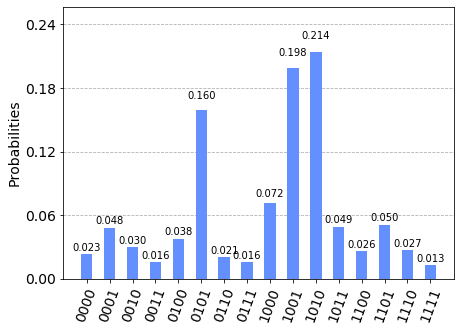

In [18]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc2)
plot_histogram([counts_exp])